___
# Ciência dos Dados - PROJETO 1

## Samuel Granato
___

## <center>Acesso à internet em diferentes regiões do Brasil e a relação com o socio-econômica</center>

___
## Introdução

O acesso à internet está se tornando cada vez mais necessário para o convívio na sociedade contemporânea, pois a comunicação digital aproxima pessoas, movimenta o mercado financeiro e proporciona lazer por meio de jogos, redes sociais entre outros. Porém essa ferramenta é tão necessária a ponto de fazer com que famílias com poucos recursos financeiros invistam na internet? Essa incógnita pode variar conforme a cultura da região em que vive?

___
## Análise e Resultados

In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [12]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Samuel\Desktop\INSPER\2 SEMESTRE\Dados\Projetos\Projeto 1\Ciencias-dos-Dados


In [23]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 16 09:23:16 2017

@author: Samuel
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dados = pd.read_table("DOM2013.csv", encoding="windows-1252", sep=",")
pd.options.mode.chained_assignment = None

dados.V02322 =dados.V02322 .astype("category")
dados.V02322.cat.categories = ("Sim","Não")
dados['FUF']=pd.Series(dados.UF)
dados['FV4622']=pd.Series(dados.V4622)
dados['FV02322']=pd.Series(dados.V02322)
dados['FV4621']=pd.Series(dados.V4621)
dados.FUF=dados.FUF.dropna()
dados.FV4622=dados.FV4622.dropna()
dados.FV02322=dados.FV02322.dropna()
dados.FV4621=dados.FV4621.dropna()

pd.to_numeric(dados.UF)
dados.FUF[(dados.FUF>10) & (dados.FUF<20)] = [1]
dados.FUF[(dados.FUF>20) & (dados.FUF<30)] = [2]
dados.FUF[(dados.FUF>30) & (dados.FUF<40)] = [3]
dados.FUF[(dados.FUF>40) & (dados.FUF<50)] = [4]
dados.FUF[(dados.FUF>50)] = [50]

dados['Renda']=pd.Series(dados.FV4621)
pd.to_numeric(dados.FV4621)
dados.Renda=dados.Renda[(dados.Renda<978)]

dados.FUF = dados.FUF.astype("category")
dados.FV4622 = dados.FV4622.astype("category")
dados.FV4622.cat.categories = ("Sem rendimento",
"Até ¼ salário mínimo",
"Mais de ¼ até ½ salário mínimo",
"Mais de ½ até 1 salário mínimo",
"Mais de 1 até  2 salários mínimos",
"Mais de  2 até  3 salários mínimos",
"Mais de 3 até 5 salários mínimos",
"Mais de 5 salários mínimos",
"Sem declaração")
dados.FUF.cat.categories = ("Norte","Nordeste","Sudeste","Sul","Centro-Oeste")

##2015

dados2 = pd.read_table("DOM2015.csv", encoding="windows-1252", sep=",")

dados2.V02322 =dados2.V02322 .astype("category")
dados2.V02322.cat.categories = ("Sim","Não")
dados2['FUF']=pd.Series(dados2.UF)
dados2['FV4622']=pd.Series(dados2.V4622)
dados2['FV02322']=pd.Series(dados2.V02322)
dados2['FV4621']=pd.Series(dados2.V4621)
dados2.FUF=dados2.FUF.dropna()
dados2.FV4622=dados2.FV4622.dropna()
dados2.FV02322=dados2.FV02322.dropna()
dados2.FV4621=dados2.FV4621.dropna()

pd.to_numeric(dados2.UF)
dados2.FUF[(dados2.FUF>10) & (dados2.FUF<20)] = [1]
dados2.FUF[(dados2.FUF>20) & (dados2.FUF<30)] = [2]
dados2.FUF[(dados2.FUF>30) & (dados2.FUF<40)] = [3]
dados2.FUF[(dados2.FUF>40) & (dados2.FUF<50)] = [4]
dados2.FUF[(dados2.FUF>50)] = [50]

dados2['Renda']=pd.Series(dados2.FV4621)
pd.to_numeric(dados2.FV4621)
dados2.Renda=dados2.Renda[(dados2.Renda<978)]

dados2.FUF = dados2.FUF.astype("category")
dados2.FV4622 = dados2.FV4622.astype("category")
dados2.FV4622.cat.categories = ("Sem rendimento",
"Até ¼ salário mínimo",
"Mais de ¼ até ½ salário mínimo",
"Mais de ½ até 1 salário mínimo",
"Mais de 1 até  2 salários mínimos",
"Mais de  2 até  3 salários mínimos",
"Mais de 3 até 5 salários mínimos",
"Mais de 5 salários mínimos",
"Sem declaração")
dados2.FUF.cat.categories = ("Norte","Nordeste","Sudeste","Sul","Centro-Oeste")




#### <center>A célula acima recebe o arquivo de PNAD DOMICÍLIO 2013 - Microdados das Pesquisas Básica e Suplementares de Acesso à Internet e à Televisão e deSegurança Alimentar e PNAD DOMICÍLIO 2015 - Microdados das Pesquisas Básica e Suplementar de Acesso à Internet e à Televisão. Depois seleciona e filtra algumas variáveis para análise.</center>

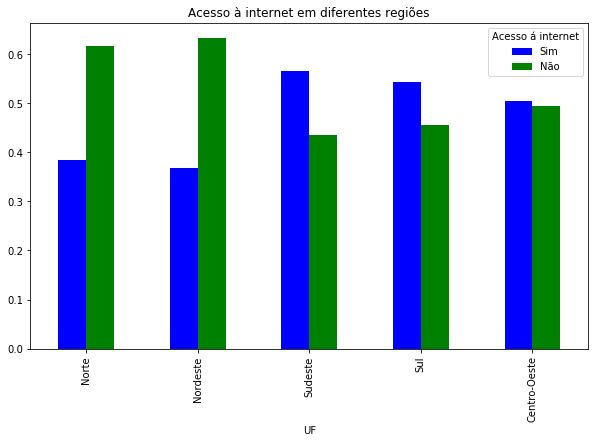

In [14]:
crosstable=pd.crosstab(dados.FUF,dados.FV02322,rownames=['UF'],normalize='index', colnames=['Acesso á internet'])
crosstable2=pd.crosstab(dados.FUF,dados.FV4622,rownames=['UF'],normalize='index', colnames=['Acesso á internet'])


plot = crosstable.plot(kind='bar',title='Acesso à internet em diferentes regiões',figsize=(10, 6),color=('b','g'))



#### <center>O gráfico acima analisa a proporção dos moradores que possuem ou não internet domiciliar (fixa e móvel).Observa-se que as regiões Norte e Nordeste frequência menor de acesso à Internet</center>

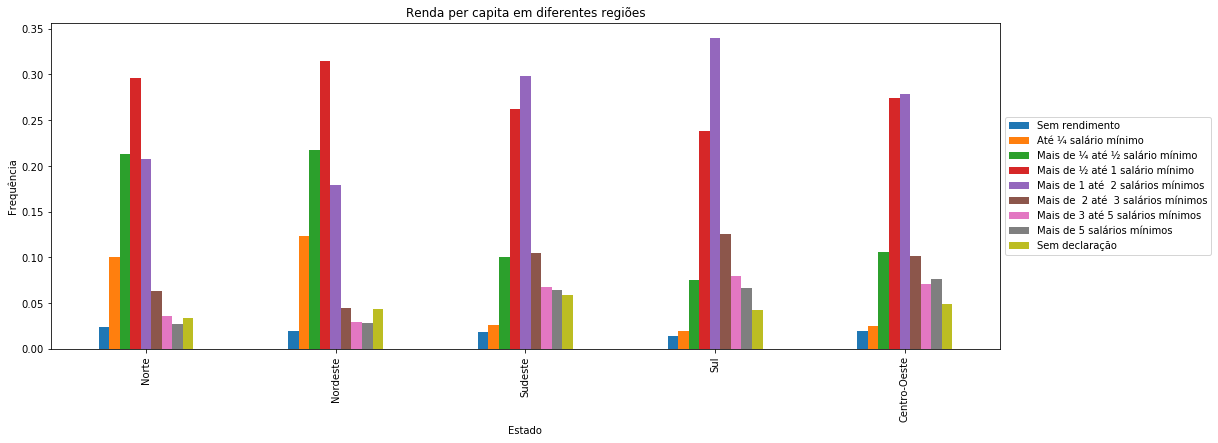

In [15]:
plot = crosstable2.plot(kind='bar',title='Renda per capita em diferentes regiões',figsize=(17, 6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel('Frequência')
plt.xlabel('Estado')
plt.show()

#### <center>A partir das faixais salariais observadas no gráfico acima, analisamos que a proporção de salário mais baixas ocorre nas regiões Norte e Nordeste. Observa-se que as regiões Sul, Sudeste e Centro-Oeste apresentam em maior quantidade acima de 1 salário mínimo (R$ 678,00, em 2013), porém Norte e Nordeste tem em grande maioria abaixo de um salário.</center>

In [41]:
dados.FRenda=dados.Renda.dropna()
dados.FRenda=dados.FRenda[dados.FRenda<1001]

Sal = (dados['Renda'] < 1001) & (dados['Renda'] > 0)
Sim = dados['FV02322'] == "Sim"

NEData=dados[Sim & Sal & (dados['FUF'] == 'Nordeste')]["Renda"]
NOData=dados[Sim & Sal & (dados['FUF'] == 'Norte')]["Renda"]
SEData=dados[Sim & Sal & (dados['FUF'] == 'Sudeste')]["Renda"]
SUData=dados[Sim & Sal & (dados['FUF'] == 'Sul')]["Renda"]
COData=dados[Sim & Sal & (dados['FUF'] == 'Centro-Oeste')]["Renda"]

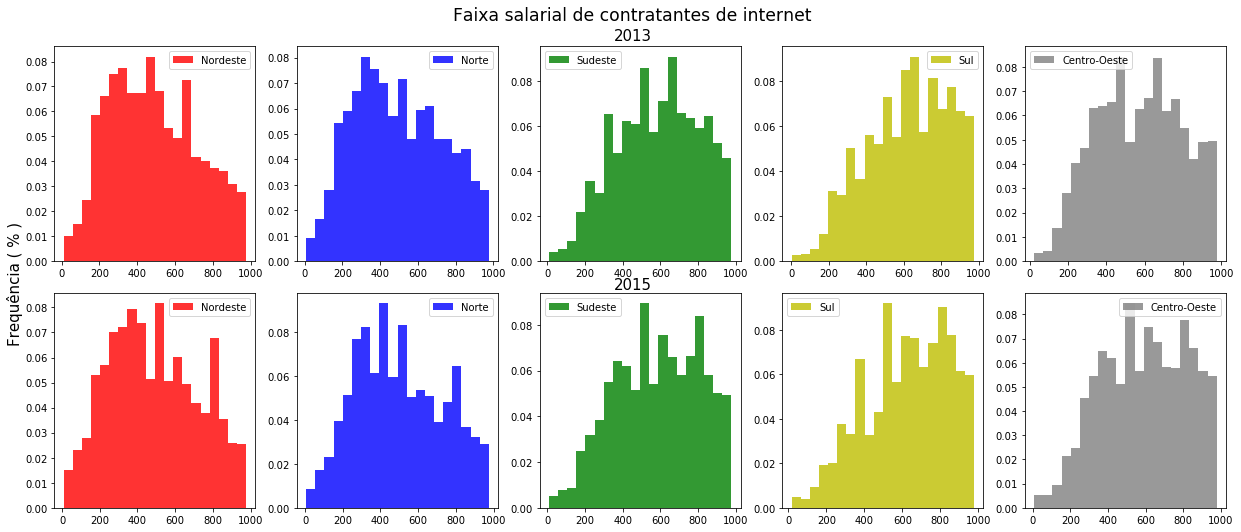

In [40]:
dados2.FRenda=dados2.Renda.dropna()
dados2.FRenda=dados2.FRenda[dados2.FRenda<1001]


fig, axes = plt.subplots(ncols=5,nrows=2,figsize=(17,7))
plt.tight_layout()


Sal = (dados2['Renda'] < 1001) & (dados2['Renda'] > 0)
Sim = dados2['FV02322'] == "Sim"


NEData2=dados2[Sim & Sal & (dados2['FUF'] == 'Nordeste')]["Renda"]
NOData2=dados2[Sim & Sal & (dados2['FUF'] == 'Norte')]["Renda"]
SEData2=dados2[Sim & Sal & (dados2['FUF'] == 'Sudeste')]["Renda"]
SUData2=dados2[Sim & Sal & (dados2['FUF'] == 'Sul')]["Renda"]
COData2=dados2[Sim & Sal & (dados2['FUF'] == 'Centro-Oeste')]["Renda"]

NEData.plot.hist(color='r',stacked=False, bins=20,legend=True,label='Nordeste',alpha=0.8,ax=axes[0,0],weights = np.zeros_like(NEData) + 1. / NEData.size)
NOData.plot.hist(color='b',stacked=True, bins=20,legend=True,label='Norte',alpha=0.8,ax=axes[0,1],weights = np.zeros_like(NOData) + 1. / NOData.size)
SEData.plot.hist(color='g',stacked=True, bins=20,legend=True,label='Sudeste',alpha=0.8,ax=axes[0,2],weights = np.zeros_like(SEData) + 1. / SEData.size)
SUData.plot.hist(color='y',stacked=True, bins=20,legend=True,label='Sul',alpha=0.8,ax=axes[0,3],weights = np.zeros_like(SUData) + 1. / SUData.size)
COData.plot.hist(color='gray',stacked=True, bins=20,legend=True,label='Centro-Oeste',alpha=0.8,ax=axes[0,4],weights = np.zeros_like(COData) + 1. / COData.size)

NEData2.plot.hist(color='r',stacked=False, bins=20,legend=True,label='Nordeste',alpha=0.8,ax=axes[1,0],weights = np.zeros_like(NEData2) + 1. / NEData2.size)
NOData2.plot.hist(color='b',stacked=True, bins=20,legend=True,label='Norte',alpha=0.8,ax=axes[1,1],weights = np.zeros_like(NOData2) + 1. / NOData2.size)
SEData2.plot.hist(color='g',stacked=True, bins=20,legend=True,label='Sudeste',alpha=0.8,ax=axes[1,2],weights = np.zeros_like(SEData2) + 1. / SEData2.size)
SUData2.plot.hist(color='y',stacked=True, bins=20,legend=True,label='Sul',alpha=0.8,ax=axes[1,3],weights = np.zeros_like(SUData2) + 1. / SUData2.size)
COData2.plot.hist(color='gray',stacked=True, bins=20,legend=True,label='Centro-Oeste',alpha=0.8,ax=axes[1,4],weights = np.zeros_like(COData2) + 1. / COData2.size)

axes[0,0].set_ylabel('')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[0,3].set_ylabel('')
axes[0,4].set_ylabel('')
axes[1,0].set_ylabel('')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')
axes[1,3].set_ylabel('')
axes[1,4].set_ylabel('')
plt.suptitle('Faixa salarial de contratantes de internet', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.983,'2013', ha='center',size=15)
fig.text(0.5, 0.489,'2015', ha='center',size=15)
fig.text(-0.011, 0.5, 'Frequência ( % )', va='center', rotation='vertical',size=15)

plt.show()

#### <center> Os gráficos gerados acima estão separados por regiões. Foi mais conveniente selecionar apenas as faixas abaixo de R$ 1000,00, pois o objetivo da análise é focar nas pessoas com menor rendas.Os gráficos apresentam apenas as faixas das pessoas que têm acesso à Internet.Pode-se observar que que há uma concentração de menor renda nas regiões Norte e Nordeste, o que leva a pensar no fato de as pessoas dessas regiões darem maior prioridade á Internet do que os moradores da regiões mais desenvolvidas.Houve uma evolução em 2013 para 2015, pois a concentração de renda está com a cauda para esquerda maior, o que indica que o número de adeptos cresceu</center>

___
# Conclusão 

### Conclui-se que o acesso à internet é de maior prioridade nas regiões Norte e Nordeste, pois a parcela da população que possui poucos recursos financeiros possui Internet em seus domicílios. Nas regiões Centro-Oeste, Sudeste e Sul, a maior concentração de Acesso à Internet está naqueles que possuem salários mais altos.Portanto o custo custo de vida e cultura da região pode influenciar fortemente na contratação de Internet domiciliar dos Brasileiros, tentendo cada vez mais a se distribuir pelas faixas de renda com a redução dos custos nessa aquisição, como pode ser observada na leve evolução entre os anos de 2013 e 2015